In [2]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./claimants.csv')
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [18]:
df['CLMSEX'] = df['CLMSEX'].fillna(df['CLMSEX'].mode()[0])
df['CLMINSUR'] = df['CLMINSUR'].fillna(df['CLMINSUR'].mode()[0])
df['SEATBELT'] = df['SEATBELT'].fillna(df['SEATBELT'].mode()[0])
df['CLMAGE'] = df['CLMAGE'].fillna(df['CLMAGE'].mean())
df['LOSS'] = df['LOSS'].fillna(df['LOSS'].mean())

In [19]:
# splitting the data into x and y
x = df.drop('ATTORNEY', axis=1)

y = df['ATTORNEY']

In [20]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

In [21]:
# create and train the model
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [37]:
def model_evaluation(model, model_name):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

    y_pred = model.predict(x_test)
    y_true = y_test

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    return model_name, accuracy, precision, recall, f1

In [40]:
knn = model_evaluation(model_knn, 'KNN')
nb = model_evaluation(model_nb, 'Naive Bayes')
svc = model_evaluation(model_svc, 'SVC')

# result_lg = evaluate_model(model_lg, 'Logistic Regression')
# result_nb = evaluate_model(model_nb, 'Naive Bayes')
# result_knn = evaluate_model(model_knn, 'KNN')
# result_svm = evaluate_model(model_svm, 'SVM')

In [46]:
ans_df = pd.DataFrame([knn,nb,svc], columns=['Model_Name', 'Accuracy','Precision','Recall','F1'])
ans_df

,Model_Name,Accuracy,Precision,Recall,F1
0,KNN,0.645161,0.625592,0.673469,0.648649
1,Naive Bayes,0.545906,0.517711,0.969388,0.674956
2,SVC,0.672457,0.635593,0.765306,0.694444


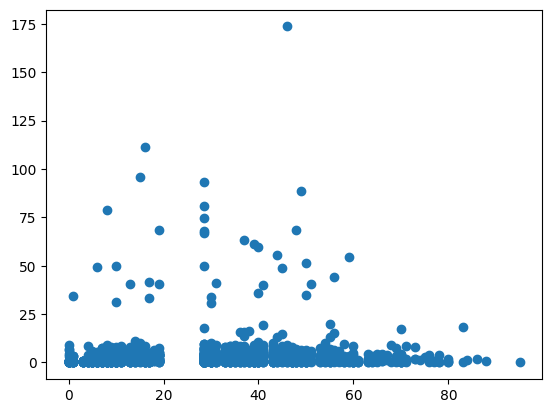

In [47]:
plt.scatter(x['CLMAGE'], x['LOSS'])

In [51]:
def graph(model, model_name):
    y_pred = model.predict(x_test)
    plt.scatter(x_test['CLMAGE'][y_pred == 1], x_test['LOSS'][y_pred == 1], color="green", label="Pass")
    plt.scatter(x_test['CLMAGE'][y_pred == 0], x_test['LOSS'][y_pred == 0], color="red", label="Fail")
    plt.xlabel('CLMAGE')
    plt.ylabel('LOSS')
    plt.title(f'Visualization for {model_name}')
    plt.legend()

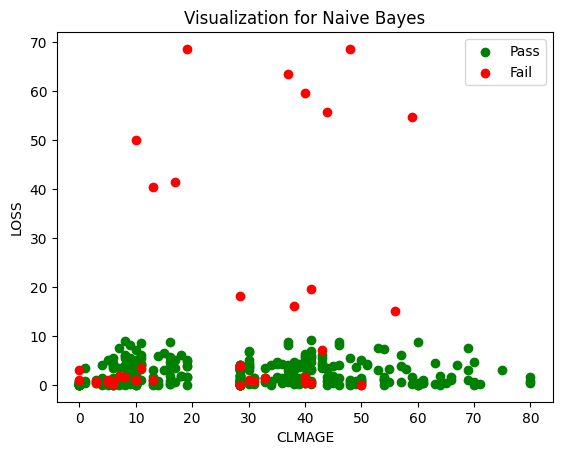

In [52]:
graph(model_nb, 'Naive Bayes')

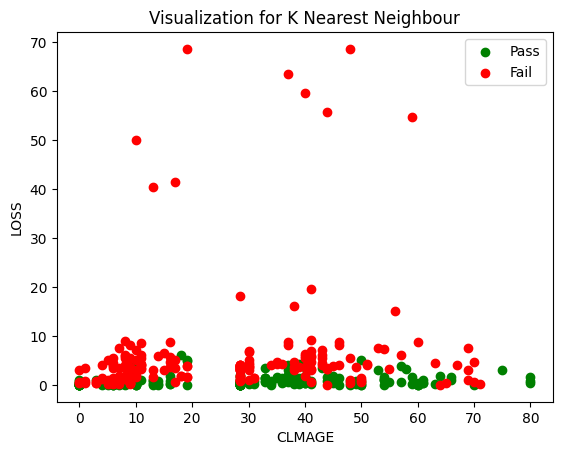

In [56]:
graph(model_knn, 'K Nearest Neighbour')

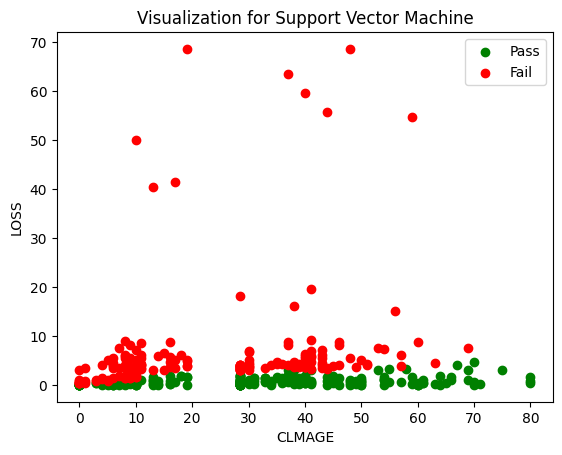

In [55]:
graph(model_svc, 'Support Vector Machine')